# その他の回帰手法

<div style="text-align: right;">
    <a href="other_ML_methods.ipynb">このページのオリジナルのipynbファイル</a>
</div>

## ニューラルネット回帰

一つの説明変数、一つの目的変数の非線形フィッティングにニューラルネット回帰を使うことはあまりないだろうが、機械学習の手法を回帰に使う事例として、これまで取り上げてきたデータ例をもとに試してみよう。

（カーネル法をいったん忘れて）基底関数の線形結合で目的変数を表す：
$$
 y = \sum_{j=1}^D w_j \phi_j (\boldsymbol{x}) \tag{1}
$$

これまで、訓練（トレーニング）データから機械学習の幾つかの方法を使って、係数$\{w_j\}$を決定することを行ってきた。

ニューラルネットの回帰手法は、これまでのフィッティングのイメージを引きつで説明すると以下のようになる。

- (1)式の出力を、複数個考える：
 $$
   a_i = \sum_{j=1}^D w_j^{(1)} \phi_j (\boldsymbol{x}) \tag{1}
 $$
 これが隠れユニット（神経細胞に相当）$i$への入力となる。

- 隠れユニットは、その入力値がある一定値を超えると発火すると考える。（これがニューロンのイメージを引き継いだ考えである。ただし、ここで階段関数を用いるのではなく、もっと平坦な関数を用いることもある。）その関数を$h(a_i)$とする。

- 隠れユニットの$i$番目のノードの「発火」は重み$w_{ji}$をかけて次の層の$j$番目のノードに伝えられる。

単純のために隠れユニット層を１層とすると、

$$
 y = \sigma \left(
     \sum_{j=1}^M w_{j}^{(2)} h\left( \sum_{j=1}^D w_j^{(1)} \phi_j (\boldsymbol{x}) \right)
 \right)
$$
 
関数$\sigma$, $h$は、外から与えるものであり、階段関数、線形関数、ロジスティック関数などが用いられる。

PRMLからの図を引用する(図5.1) この図では出力は$M$個書かれているが、上の式では、出力（目的変数）一つだけにしたことに注意。
<img src="http://8tops.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/images/prmlfigs-png/Figure5.1.png" width="400"/>


トレーニングデータを用いて、ノード間の結合係数$w_{ij}^{k}$をどのように決めるかがニューラルネットの本題であるが、ここでは省略する。



## scikit-learnのニューラルネット回帰

scikit-learnにはニューラルネット回帰のモジュールMLPRegressorが提供されている。(MLPはMulti-layer Perceptronの略)

今まで使ってきた$\sin$関数に乱数を加えたデータと多項式（べき）基底関数を使って、MLPregressorを試してみよう。

In [1]:
# データ作成用関数
import random
def make_data_by_sin_gaussian(x):
    # y=sin (x)を計算し、ガウス分布に従うノイズを加える
    y = np.sin(x)
    e = [random.gauss(0, 0.2) for i in range(len(y))]
    # e = np.random.randn(len(x))*0.2
    y += e
    return y


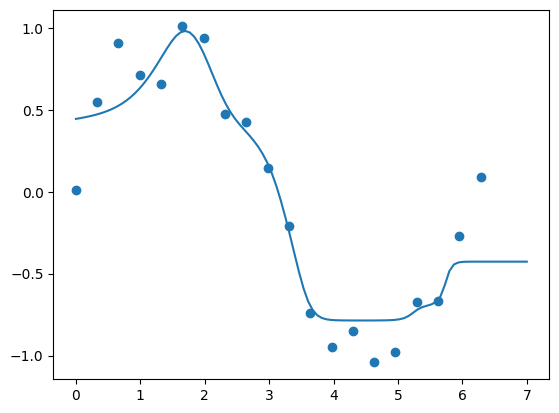

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

x_max = 7.  # 予測の範囲の上限

# トレーニングデータ作成
n_tr = 20
x = np.linspace(0., np.pi*2., n_tr) # リスト 0から２πまでをn_tr等分した値を一次元配列
y = make_data_by_sin_gaussian(x)

# 基底関数をM次の多項式とする
deg = 5
X = np.vander(x, deg+1) # 計画行列の作成
# X = x[:, np.newaxis]
   
# 学習を行う
mlp = MLPRegressor(activation="logistic", hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X,y)

# 予測
x_test = np.linspace(0, x_max, 100)
y_test = mlp.predict(np.vander(x_test, deg+1))
    
#プロット
plt.scatter(x, y)
plt.plot(x_test, y_test)

plt.show()


## ランダムフォレストによる回帰


訓練データを「決定木」によって分割していき、多くの分割を総合する手法をランダムフォレスト(random forest)という。https://ja.wikipedia.org/wiki/%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88


この手法も多数の説明変数がある場合の分類（例えば画像認識）に用いることが多いが、ここでは、上のデータ、つまり多項式のそれぞれの値を独立な説明変数として入力し、ランダムフォレストのモジュールを利用してみよう。

パラメータはたくさんあるが、ここでは既定値での評価だけを示す。（というか、それしかできないので。）

Web検索を行うと、ボストンデータを用いた予測例などがたくさんあるので参考にしてほしい。


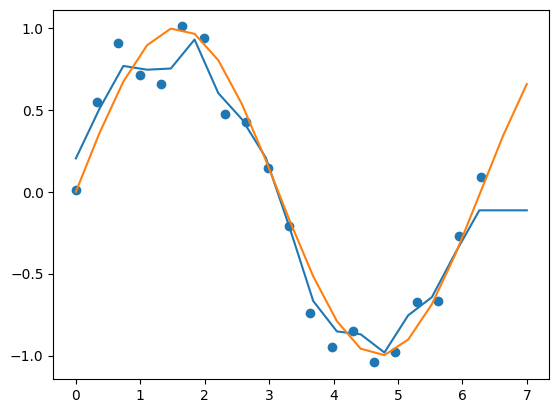

In [3]:
from sklearn.ensemble import RandomForestRegressor as RFR

# 学習を行う
rfr = RFR()
rfr.fit(X,y)

# 予測
num_test = 20
x_test = np.linspace(0, x_max, num_test)
y_test = rfr.predict(np.vander(x_test, deg+1))
    
#プロット
plt.scatter(x, y)
plt.plot(x_test, y_test)

# sin(x)のプロット
plt.plot(x_test, np.sin(x_test))

plt.show()


どちらの方法もハイパーパラメータがたくさんあり、利用する際にそれらを根拠をもって指定できる場合は、それでよいが、多くの場合、交差検定を行って、過学習にならないようにパラメータをセットする必要がある。そのことは忘れないでほしい。

sckit-learnでは、パラメータをしらみつぶしにさがすGridSearchCVなどが用意されている。

とはいえ、グリッドサーチにしてもその範囲は使う側がセットする必要がある。（それが多すぎるとランダムフォレストの場合などは猛烈に長い時間を要することになる。）

### 参考：決定木の可視化

ランダムフォレストは、データから重複を許してランダムに抽出した複数のデータセットを用意して、それらを決定木により分類学習を行い、アンサンブル学習（多数決）により予測器をつくるものである。

その一つの決定木を図示するモジュールが作られている。

分類木を図示するツールとしてdtreevizが高機能なようだ。（ただし、作成には相当な時間を要する。また、Anacondaのパッケージには入ってないので、インストールツールpipを使ってインストールする必要がある。）

ここではの例は説明変数が一つという単純なであるが、分類がどのように行われるかを知る参考になるだろう。

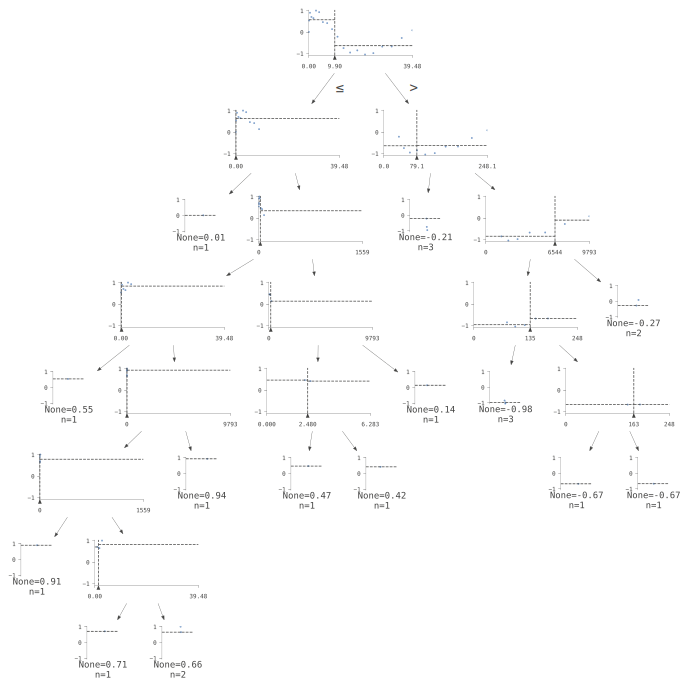

In [4]:
from sklearn import tree
# from dtreeviz.trees import *
import dtreeviz
import graphviz
estimators = rfr.estimators_
# viz = dtreeviz(
#     estimators[0],
#     X, 
#     y
# ) 
viz = dtreeviz.model(
    estimators[0],
    X,
    y
)

# viz
viz.view(fontname="monospace")

## 参考：Random Forest Regressor を用いたBostonデータの考察

Web上の利用例紹介ページ（https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/ Oxford Protain Informatics Groupによる）をもとに、サンプルとしてよく用いられるBostonの住宅価格データをRandom Forest によって調べてみる。

- 評価のために、トレーニングデータとテストデータへの分割
- データの標準化(Standardization): 説明変数の平均値と標準偏差がそろうようにスケールすること
- 標準化したデータに対するランダムフォレスト回帰分析

上記ページでは標準化を行う前と後で、主成分分析により説明変数の重要度の変化を見ているが、ここでは省略

データはpandasのDataFrameとして作成している。

同様なプログラム例：https://hinomaruc.hatenablog.com/entry/2019/11/14/200857


In [5]:
def load_boston():
    import numpy as np
    import pandas as pd
    from sklearn.utils import Bunch
    
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    target_names = ['MEDV']
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    DESCR = """
        .. _boston_dataset:

        Boston house prices dataset
        ---------------------------
        
        **Data Set Characteristics:**  
        
            :Number of Instances: 506 
        
            :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
        
            :Attribute Information (in order):
                - CRIM     per capita crime rate by town
                - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
                - INDUS    proportion of non-retail business acres per town
                - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                - NOX      nitric oxides concentration (parts per 10 million)
                - RM       average number of rooms per dwelling
                - AGE      proportion of owner-occupied units built prior to 1940
                - DIS      weighted distances to five Boston employment centres
                - RAD      index of accessibility to radial highways
                - TAX      full-value property-tax rate per $10,000
                - PTRATIO  pupil-teacher ratio by town
                - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                - LSTAT    % lower status of the population
                - MEDV     Median value of owner-occupied homes in $1000's
        
            :Missing Attribute Values: None
        
            :Creator: Harrison, D. and Rubinfeld, D.L.
        
        This is a copy of UCI ML housing dataset.
        https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
        
        
        This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
        
        The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
        prices and the demand for clean air', J. Environ. Economics & Management,
        vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
        ...', Wiley, 1980.   N.B. Various transformations are used in the table on
        pages 244-261 of the latter.
        
        The Boston house-price data has been used in many machine learning papers that address regression
        problems.   
             
        .. topic:: References
        
           - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
           - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
    """
    return Bunch(data=data,
                 target=target,
                 frame=None,
                 target_names=target_names,
                 feature_names=feature_names,
                 DESCR=DESCR)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# データの読み込み
# boston = datasets.load_boston()
boston = load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

# 訓練データとテストデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

# データの正規化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

# ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

# 予測と結果の表示
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.841
Test data R-2 score: 0.883
Test data Spearman correlation: 0.903
Test data Pearson correlation: 0.94


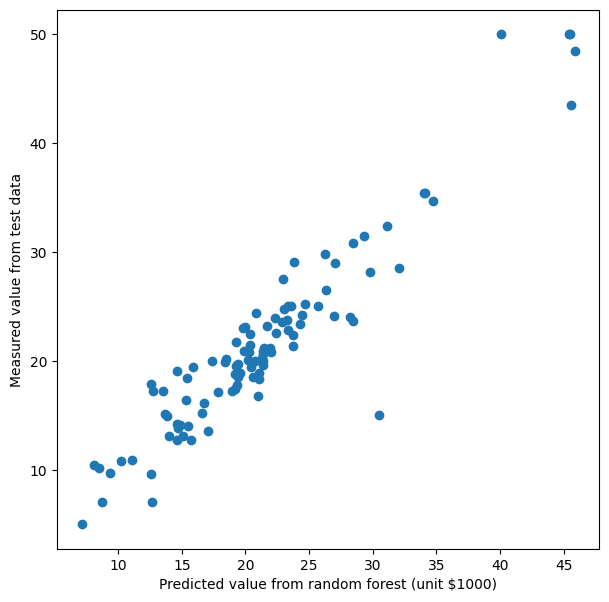

In [7]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(predicted_test, y_test)
# ax1.set_xlabel("ランダムフォレストによるテストデータの予測値 (単位$1000)")
# ax1.set_ylabel("テストデータの実測値")
ax1.set_xlabel("Predicted value from random forest (unit $1000)")
ax1.set_ylabel("Measured value from test data")
plt.show()

上記では、引用したページと同じ木の数(n_estimators)を500にしているが、もっと少なくてもさほど違わないだろう。

以前に紹介した[単純な重回帰分析](https://8tops.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/multiple_regression.html)の結果との比較をしてみてほしい。


以下にgraphvizによる図示プログラム例を示す。（巨大な木で、画像のダウンロードに時間がかかるので出力は削除した。）

In [8]:
from sklearn import tree
# from dtreeviz.trees import *
import dtreeviz
import graphviz
estimators = rf.estimators_
# viz = dtreeviz(
#     estimators[0],
#     X_train, 
#     y_train,
#     target_name='price',
#     feature_names=boston.feature_names,
#     # class_names=[],
# ) 
viz = dtreeviz.model(
    estimators[0],
    X_train,
    y_train,
    target_name='price',
    feature_names=boston.feature_names,
)

# viz
viz.view(fontname="monospace")


多数の大量な説明変数をもつデータの分類、回帰に対する決定木ベースの手法は、最近も研究が進んでいるようだ。
そのなかでもXGBoostなどが有名である。モジュールも存在するので興味ある人は試してみてほしい。